In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import PIL
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import image
import cv2
import os 


In [7]:
#%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
from zipfile import ZipFile
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [4]:
img_size = 212

In [5]:
#path = '/content/drive/My Drive/images_training_rev1/'
path = 'C:\\Users\\user\\Desktop\\project253\\images_training_rev1\\'
#img_id = list()
j = 0
size_of_images = 30000 #oriaka ftiaxnei numpyarray!
rgb = 3
#loaded_images = np.empty((size_of_images,img_size,img_size,rgb))
loaded_images = []
for filename in listdir(path):
    #images = cv2.imread(os.path.join(path,filename),cv2.IMREAD_GRAYSCALE)
    images_g = image.imread("C:\\Users\\user\\Desktop\\project253\\images_training_rev1\\" + filename)
    #images_g = cv2.imread("C:\\Users\\user\\Desktop\\project253\\images_training_rev1\\" + filename)
    images_g = cv2.resize(images_g,(img_size,img_size))
    #images_g = images_g.astype('float32') / 255.0
    # store loaded image
    #img_id.append(filename)
    #np.append(loaded_images,images_g)
    loaded_images.append(images_g)
    print('> loaded %s %s' % (filename, images_g.shape))
    del images_g
    j = j + 1
    if j==size_of_images:
        break








> loaded 100008.jpg (212, 212, 3)
> loaded 100023.jpg (212, 212, 3)
> loaded 100053.jpg (212, 212, 3)
> loaded 100078.jpg (212, 212, 3)
> loaded 100090.jpg (212, 212, 3)
> loaded 100122.jpg (212, 212, 3)
> loaded 100123.jpg (212, 212, 3)
> loaded 100128.jpg (212, 212, 3)
> loaded 100134.jpg (212, 212, 3)
> loaded 100143.jpg (212, 212, 3)
> loaded 100150.jpg (212, 212, 3)
> loaded 100157.jpg (212, 212, 3)
> loaded 100187.jpg (212, 212, 3)
> loaded 100204.jpg (212, 212, 3)
> loaded 100237.jpg (212, 212, 3)
> loaded 100259.jpg (212, 212, 3)
> loaded 100263.jpg (212, 212, 3)
> loaded 100288.jpg (212, 212, 3)
> loaded 100295.jpg (212, 212, 3)
> loaded 100322.jpg (212, 212, 3)
> loaded 100335.jpg (212, 212, 3)
> loaded 100367.jpg (212, 212, 3)
> loaded 100380.jpg (212, 212, 3)
> loaded 100382.jpg (212, 212, 3)
> loaded 100383.jpg (212, 212, 3)
> loaded 100402.jpg (212, 212, 3)
> loaded 100428.jpg (212, 212, 3)
> loaded 100434.jpg (212, 212, 3)
> loaded 100444.jpg (212, 212, 3)
> loaded 10044

In [6]:
loaded_images = np.array(loaded_images)

In [ ]:
#from numpy import genfromtxt
#soft_labels = genfromtxt("C:\\Users\\user\\Desktop\\project253\\training_solutions_rev1.csv", delimiter=',')
#soft_pd = pd.read_csv("C:\\Users\\user\\Desktop\\project253\\training_solutions_rev1.csv", delimiter=',')
#soft_labels = soft_labels[1:]#first row is the class ,first column are the ids
#soft_labels = soft_labels[:,1:]
#print(soft_labels)
#soft_pd.index = soft_pd.iloc[:,0]
#soft_pd = soft_pd.drop(['GalaxyID'], axis=1) pros to parwn eksw
#soft_pd.head(20)
#soft_pd['Class 1.1,7.1'] = soft_pd[['Class1.1']].multiply(soft_pd["Class7.1"],axis = 1)
#print(soft_pd.head)

In [ ]:

#ola auta einai oi stiles
#class171 = soft_labels[:,15]#1
#class172 = soft_labels[:,16]#2
#class173 = soft_labels[:,17]#3
#class129_1 = soft_labels[:,25]#$
#class129_2 =  soft_labels[:,26]#5
#class129_3 =  soft_labels[:,27]#6
#class12_2_2_3_1 = soft_labels[:,5]#7
#class12_2_2_3_2= soft_labels[:,6]#8
#class13 = soft_labels[:,2]#9


In [ ]:
#class17_1_paper = soft_labels[:,15]#1 completely round smooth
#class17_2_paper = soft_labels[:,16]#2 In-between smooth
#class17_3_paper = soft_labels[:,17]#3 cigar-shaped smooth
#class12_1_paper = soft_labels[:,3]# =edge on
#class12_2_4_paper =  soft_labels[:,7]#5 = spiral


In [ ]:
#d = {'1': class171, '2': class172,'3':class173,'4':class129_1,'5':class129_2,'6':class129_3,'7':class12_2_2_3_1,'8':class12_2_2_3_2,'9':class13}

In [ ]:
#d  = {'1': class171, '2': class172,'3':class173,'4':class129_1,'5':class129_3,'6':class12_2_2_3_1,'7':class12_2_2_3_2}

In [ ]:
#d2  = {'1': class17_1_paper, '2': class17_2_paper,'3':class17_3_paper,'4':class12_1_paper,'5':class12_2_4_paper }

In [ ]:
#allgalaxies = pd.DataFrame(data=d) #i 5i klassi (4o index exei polla midenika ..)
#papergalaxies = pd.DataFrame(data=d2)


In [7]:
from numpy import genfromtxt
soft_labels = genfromtxt("C:\\Users\\user\\Desktop\\project253\\training_solutions_rev1.csv", delimiter=',')#fortwneis ta labels
soft_labels = soft_labels[1:]#first row is the class ,first column are the ids
soft_labels = soft_labels[:,1:]
hard_labels = []

def make_classes(originaldata): # epilegeis klasseis 
    for i in range(0,len(loaded_images)):
        if originaldata[i,0] >= 0.469 and originaldata[i,15] >=0.5:
            hard_labels.append(0)
        elif originaldata[i,0]  >= 0.469 and originaldata[i,16] >=0.5:
            hard_labels.append(1)
        elif originaldata[i,0]  >= 0.469 and originaldata[i,17] >=0.5:
            hard_labels.append(2)
        elif originaldata[i,1]  >= 0.43 and originaldata[i,3] >=0.602:
            hard_labels.append(3)
        elif originaldata[i,1] >= 0.43 and originaldata[i,4] >=0.715 and originaldata[i,7] >=0.619:
            hard_labels.append(4)
        else:
            hard_labels.append(5)
            
make_classes(soft_labels)            
keepindexes = []

for i in range(0,len(hard_labels)):
    if hard_labels[i] != 5:
        keepindexes.append(i)
new_loaded_images = []

for i in keepindexes:
    new_loaded_images.append(loaded_images[i]) #edw vazeis tin lista me tis dikes sou eikones
new_hard_labels = []

for i in keepindexes:
    new_hard_labels.append(hard_labels[i])
    
new_hard_labels = np.array(new_hard_labels)
new_loaded_images = np.array(new_loaded_images)
    
from tensorflow.keras.utils import to_categorical
new_hard_labels = to_categorical(new_hard_labels) #kai sinexizeis me train_test_split ktlp..

In [8]:
#original 9 classes
class171 = soft_labels[:,15]#1
class172 = soft_labels[:,16]#2
class173 = soft_labels[:,17]#3
class129_1 = soft_labels[:,25]#$
class129_2 =  soft_labels[:,26]#5
class129_3 =  soft_labels[:,27]#6
class12_2_2_3_1 = soft_labels[:,5]#7
class12_2_2_3_2= soft_labels[:,6]#8
class13 = soft_labels[:,2]#9

In [9]:
d = {'1': class171, '2': class172,'3':class173,'4':class129_1,'5':class129_2,'6':class129_3,'7':class12_2_2_3_1,'8':class12_2_2_3_2,'9':class13}
allgalaxies = pd.DataFrame(data=d)

In [10]:
#(highest propability method)
def choose_class(data):
    for i in range(0,len(loaded_images)):#kanonika len(dataX) #to meiwsa giati den xwraei stin mnimi
        for j in range(0,len(d)):
            if data.iloc[i,j]!=np.max(data.iloc[i,:]):
                data.iloc[i,j] = 0
            else:
                data.iloc[i,j] = 1
    return data[0:len(loaded_images)]
result = choose_class(allgalaxies)


In [11]:
labels_original = np.array(result)

In [12]:
#for 212,212 size!
height , width = 212 , 212
#new_dim1 = 106#was 85 
new_dim = 120
img_size = 106
new_loaded_images_rs =[]
def crop_and_resize(images,new_dim):
    for i in range(0,len(images)):
        new_height = new_dim#np.random.randint(new_dim1,new_dim2)
        new_width = new_height
        x_1 = int((width - new_width)/2)
        x_2 = int((width + new_width)/2)
        y_1 = int((height - new_height)/2)
        y_2 = int((height + new_height)/2)
        images_new = images[i][y_1:y_2, x_1:x_2]
        images_new = cv2.resize(images_new,(img_size,img_size))
        new_loaded_images_rs.append(images_new)
        #del images[i]

In [13]:
print(len(new_loaded_images))

13999


In [14]:
crop_and_resize(new_loaded_images,new_dim)
del new_loaded_images

In [15]:
height , width = 212 , 212
#new_dim1 = 106#was 85 
new_dim = 120
img_size = 106
new_loaded_images_original =[]
def crop_and_resize_original(images,new_dim):
    for i in range(0,len(images)):
        new_height = new_dim#np.random.randint(new_dim1,new_dim2)
        new_width = new_height
        x_1 = int((width - new_width)/2)
        x_2 = int((width + new_width)/2)
        y_1 = int((height - new_height)/2)
        y_2 = int((height + new_height)/2)
        images_new = images[i][y_1:y_2, x_1:x_2]
        images_new = cv2.resize(images_new,(img_size,img_size))
        new_loaded_images_original.append(images_new)
        #del images[i]
crop_and_resize_original(loaded_images,new_dim)
del loaded_images

In [16]:
new_loaded_images_rs = np.array(new_loaded_images_rs)
new_loaded_images_original = np.array(new_loaded_images_original)

In [17]:
print(len(new_loaded_images_rs))
#del loaded_images
#del new_loaded_images

13999


In [18]:
from sklearn.model_selection import train_test_split
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(new_loaded_images_original,labels_original,shuffle = True, test_size=0.1, random_state=42,stratify=labels_original)#was dataX

In [19]:
from sklearn.model_selection import train_test_split
X_train_paper, X_test_paper, y_train_paper, y_test_paper = train_test_split(new_loaded_images_rs,new_hard_labels,shuffle = True, test_size=0.1, random_state=42,stratify=new_hard_labels)

In [20]:
X_train_paper = X_train_paper.astype('float32')/252.
X_test_paper = X_test_paper.astype('float32')/252.
X_train_original = X_train_original.astype('float32')/252.
X_test_original = X_test_original.astype('float32')/252.

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization,Conv2D,Dropout,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
np.random.seed(42)
tf.random.set_seed(42)
model = models.Sequential() #,kernel_initializer='he_uniform'
model.add(layers.Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding='same' ,input_shape = (106, 106, 3)))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3, 3) ,kernel_initializer='he_uniform',padding='same'))#was 32
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))#was 0.4
model.add(layers.Conv2D(64, (3, 3) , kernel_initializer='he_uniform',padding='same' ))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),kernel_initializer='he_uniform',padding='same' ))#was 64
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3)) 
model.add(layers.Conv2D(128, (3, 3) , kernel_initializer='he_uniform',padding='same'))
model.add(LeakyReLU( alpha = 0.1 ) )#256
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform',padding='same'))#was 128
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4)) 
model.add(layers.Conv2D(256, (3, 3), kernel_initializer='he_uniform',padding='same'))
model.add(LeakyReLU( alpha = 0.1 ) )#512
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), kernel_initializer='he_uniform',padding='same'))#was 256
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.45)) 
model.add(layers.Conv2D(512, (3, 3),kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), kernel_initializer='he_uniform',padding='same'))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5)) 
model.add(layers.Flatten())
model.add(layers.Dense(512,kernel_initializer='he_uniform'))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(256,kernel_initializer='he_uniform'))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(layers.Dense(128,kernel_initializer='he_uniform'))
model.add(LeakyReLU( alpha = 0.1 ) )
model.add(BatchNormalization())
model.add(Dropout(0.4))#was 0.5
model.add(layers.Dense(5, activation = 'softmax'))
model.summary()
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 106, 106, 32)      896       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 106, 106, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 106, 106, 32)      128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 106, 106, 32)      0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 106, 106, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 32)       

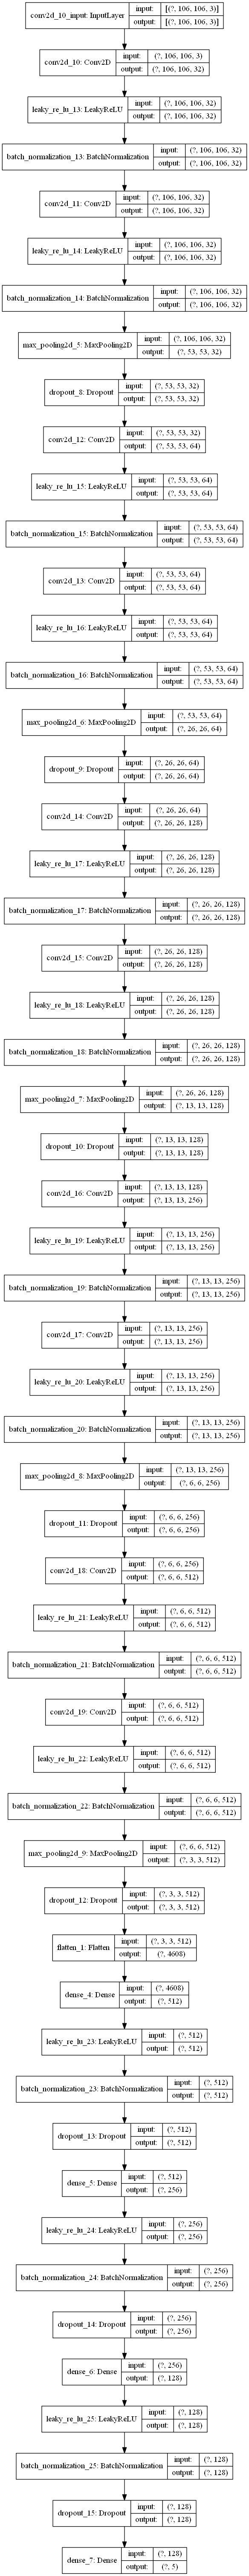

In [13]:
plot_model(model, to_file='C://Users//user//Desktop//project253//model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
np.random.seed(42)
tf.random.set_seed(42)
model_or = models.Sequential() #,kernel_initializer='he_uniform'
model_or.add(layers.Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding='same' ,input_shape = (106, 106, 3)))
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
# kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
#model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))
model_or.add(layers.Conv2D(32, (3, 3) ,kernel_initializer='he_uniform',padding='same'))#was 32
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(layers.MaxPooling2D((2, 2)))
model_or.add(Dropout(0.2))#was 0.4
model_or.add(layers.Conv2D(64, (3, 3) , kernel_initializer='he_uniform',padding='same' ))
model_or.add(BatchNormalization())
model_or.add(layers.Conv2D(64, (3, 3),kernel_initializer='he_uniform',padding='same' ))#was 64
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(layers.MaxPooling2D((2, 2)))
model_or.add(Dropout(0.3)) 
model_or.add(layers.Conv2D(128, (3, 3) , kernel_initializer='he_uniform',padding='same'))
model_or.add(LeakyReLU( alpha = 0.01 ) )#256
model_or.add(BatchNormalization())
model_or.add(layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform',padding='same'))#was 128
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(layers.MaxPooling2D((2, 2)))
model_or.add(Dropout(0.4)) 
model_or.add(layers.Conv2D(256, (3, 3), kernel_initializer='he_uniform',padding='same'))
model_or.add(LeakyReLU( alpha = 0.01 ) )#512
model_or.add(BatchNormalization())
model_or.add(layers.Conv2D(256, (3, 3), kernel_initializer='he_uniform',padding='same'))#was 256
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(layers.MaxPooling2D((2, 2)))
model_or.add(Dropout(0.4)) 
model_or.add(layers.Conv2D(512, (3, 3),kernel_initializer='he_uniform', padding='same'))
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(layers.Conv2D(512, (3, 3), kernel_initializer='he_uniform',padding='same'))
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(layers.MaxPooling2D((2, 2)))
model_or.add(Dropout(0.5)) 
model_or.add(layers.Flatten())
model_or.add(layers.Dense(512,kernel_initializer='he_uniform'))
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(Dropout(0.5))
model_or.add(layers.Dense(256,kernel_initializer='he_uniform'))
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(Dropout(0.4))
model_or.add(layers.Dense(128,kernel_initializer='he_uniform'))
model_or.add(LeakyReLU( alpha = 0.01 ) )
model_or.add(BatchNormalization())
model_or.add(Dropout(0.3))#was 0.5
model_or.add(layers.Dense(9, activation = 'softmax'))
model_or.summary()
model_or.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 106, 106, 32)      896       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 106, 106, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 106, 106, 32)      128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 106, 106, 32)      0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 106, 106, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 32)       

In [24]:
np.random.seed(42)
tf.random.set_seed(42)
#discarded model
from tensorflow.keras.callbacks import EarlyStopping 
early_stopping_or = EarlyStopping(patience = 15, restore_best_weights = True,monitor='val_accuracy') #was p =15
history_original = model_or.fit(X_train_original, y_train_original,shuffle='True',batch_size=32, epochs = 100, validation_data = (X_test_original, y_test_original),callbacks = [early_stopping_or])

Train on 27000 samples, validate on 3000 samples
Epoch 1/100
27000/27000 [==============================] - 85s 3ms/sample - loss: 1.6518 - accuracy: 0.4209 - val_loss: 1.3345 - val_accuracy: 0.4703
Epoch 2/100
27000/27000 [==============================] - 78s 3ms/sample - loss: 1.2290 - accuracy: 0.5206 - val_loss: 1.1982 - val_accuracy: 0.5290
Epoch 3/100
27000/27000 [==============================] - 78s 3ms/sample - loss: 1.0861 - accuracy: 0.5754 - val_loss: 1.0754 - val_accuracy: 0.5660
Epoch 4/100
27000/27000 [==============================] - 78s 3ms/sample - loss: 1.0017 - accuracy: 0.6028 - val_loss: 1.0428 - val_accuracy: 0.5750
Epoch 5/100
27000/27000 [==============================] - 78s 3ms/sample - loss: 0.9589 - accuracy: 0.6183 - val_loss: 0.9400 - val_accuracy: 0.6117
Epoch 6/100
27000/27000 [==============================] - 78s 3ms/sample - loss: 0.9221 - accuracy: 0.6345 - val_loss: 0.9066 - val_accuracy: 0.6340
Epoch 7/100
27000/27000 [==========================

KeyboardInterrupt: 

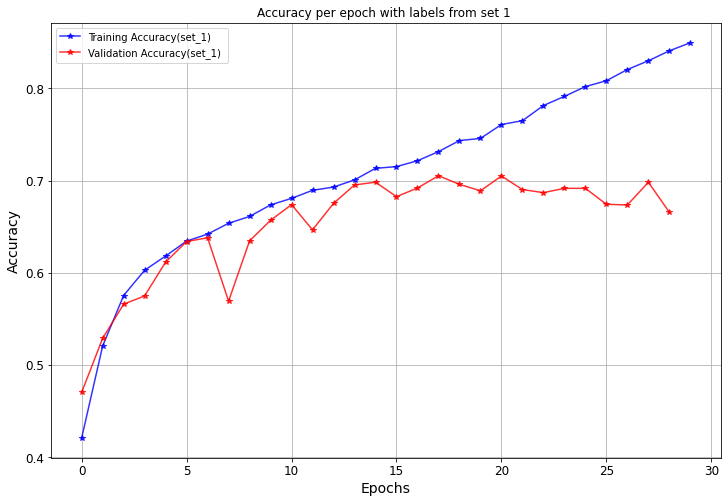

In [26]:
fig= plt.figure( figsize = (12,8) )
plt.plot(model_or.history.history["accuracy"], "b*-", label = "Training Accuracy(set_1) ",alpha=0.8)#k*--
plt.plot(model_or.history.history["val_accuracy"], "r*-", label = "Validation Accuracy(set_1) ",alpha=0.8)#k*--
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch with labels from set 1 ")
plt.xlabel("Epochs")
plt.legend(loc='best')
plt.grid()
plt.savefig('C://Users//user//Desktop//project253//accuracy_original_model_set_1.png',dpi=100)
plt.show()

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience = 10, restore_best_weights = True,monitor='val_accuracy') #was p =15history = model.fit(X_train_paper, y_train_paper,shuffle='True',batch_size=32, epochs = 100, validation_data = (X_test_paper, y_test_paper),callbacks = [early_stopping])
#0.926 best
history = model.fit(X_train_paper, y_train_paper,shuffle='True',batch_size=32, epochs = 30, validation_data = (X_test_paper, y_test_paper),callbacks = [early_stopping])

Train on 12599 samples, validate on 1400 samples
Epoch 1/30
12599/12599 [==============================] - 39s 3ms/sample - loss: 1.2797 - accuracy: 0.5212 - val_loss: 3.0945 - val_accuracy: 0.2857
Epoch 2/30
12599/12599 [==============================] - 37s 3ms/sample - loss: 0.8380 - accuracy: 0.6489 - val_loss: 1.2112 - val_accuracy: 0.4800
Epoch 3/30
12599/12599 [==============================] - 37s 3ms/sample - loss: 0.6669 - accuracy: 0.7399 - val_loss: 0.6953 - val_accuracy: 0.7421
Epoch 4/30
12599/12599 [==============================] - 37s 3ms/sample - loss: 0.5183 - accuracy: 0.8087 - val_loss: 0.5098 - val_accuracy: 0.8214
Epoch 5/30
12599/12599 [==============================] - 37s 3ms/sample - loss: 0.4175 - accuracy: 0.8504 - val_loss: 0.4106 - val_accuracy: 0.8443
Epoch 6/30
12599/12599 [==============================] - 37s 3ms/sample - loss: 0.3942 - accuracy: 0.8577 - val_loss: 0.4240 - val_accuracy: 0.8429
Epoch 7/30
12599/12599 [==============================] -

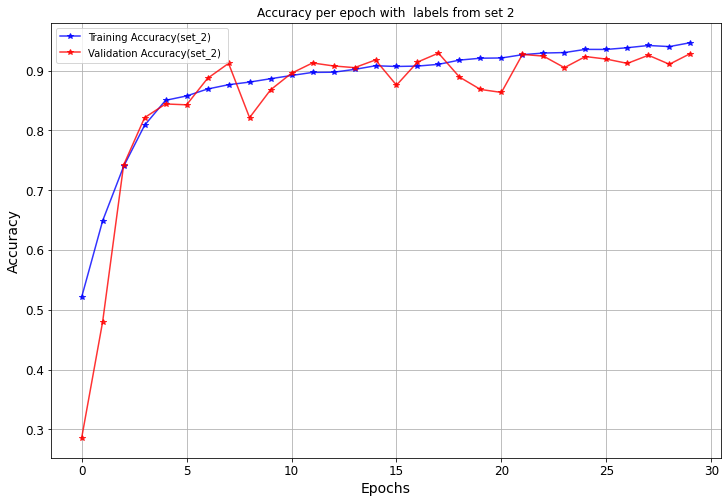

In [57]:
#18i epoch best 0.9293!
fig = plt.figure( figsize = (12,8) )
plt.plot(model.history.history["accuracy"], "b*-", label = "Training Accuracy(set_2) ",alpha=0.8)#k*--
plt.plot(model.history.history["val_accuracy"], "r*-", label = "Validation Accuracy(set_2) ",alpha=0.8)#k*--
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch with  labels from set 2")
plt.xlabel("Epochs")
plt.legend(loc='best')
plt.grid()
plt.savefig('C://Users//user//Desktop//project253//accuracy_final_model.png',dpi=100)
plt.show()

In [32]:
# 5i epoxi 0.8631,20i epoxi 9380,teliko 0.9426  me 32..64... ktlp layers,krata auto! den exoun diafora ta alla..
#
y_pred = model.predict(X_test_paper)


In [33]:
#y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[[3.0964540e-04 9.9449921e-01 2.4679341e-04 1.0358186e-05 4.9340064e-03]
 [1.0093083e-05 6.2970485e-06 6.4497115e-03 9.9349618e-01 3.7816208e-05]
 [1.7587833e-02 9.8219270e-01 3.4433448e-05 1.7158951e-05 1.6785081e-04]
 ...
 [1.2516441e-02 6.8514064e-02 4.9289392e-04 2.4935426e-03 9.1598308e-01]
 [9.9598134e-01 3.4527928e-03 2.5765863e-05 4.9842605e-05 4.9028592e-04]
 [3.0226442e-01 6.9680822e-01 8.5422282e-05 1.0832962e-04 7.3352811e-04]]


In [34]:
y_test_paper2 = np.argmax(y_test_paper,axis=1)
print(y_test_paper2)

[1 3 1 ... 1 0 1]


In [53]:
y_train_paper2 = np.argmax(y_train_paper,axis=1)
print(y_train_paper2)

[1 1 0 ... 3 4 4]


In [35]:
results = model.evaluate(X_test_paper, y_test_paper, batch_size=32) #nice!

1400/1400 [==============================] - 1s 1ms/sample - loss: 0.2047 - accuracy: 0.9286


In [37]:
y_pred_2 = np.argmax(y_pred,axis=1)#converts back from one-hot
print(y_pred_2[0:30])
print(y_test_paper2[0:30])

[1 3 1 1 1 1 1 4 1 4 1 1 1 4 1 1 4 1 3 4 4 4 0 0 3 0 0 0 4 0]
[1 3 1 1 1 1 0 4 1 4 1 1 1 4 1 1 4 1 3 4 4 4 0 1 3 0 0 0 4 0]


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
target_names = ['class 0', 'class 1', 'class 2','class3','class4']
print(classification_report(y_test_paper2, y_pred_2, target_names=target_names, digits=4))
print(confusion_matrix(y_test_paper2, y_pred_2))

              precision    recall  f1-score   support

     class 0     0.9585    0.9250    0.9415       400
     class 1     0.8837    0.9669    0.9235       393
     class 2     0.5862    0.5667    0.5763        30
      class3     0.9128    0.9271    0.9199       192
      class4     0.9861    0.9221    0.9530       385

    accuracy                         0.9286      1400
   macro avg     0.8655    0.8615    0.8628      1400
weighted avg     0.9309    0.9286    0.9288      1400

[[370  29   0   0   1]
 [  7 380   0   2   4]
 [  0   3  17  10   0]
 [  0   3  11 178   0]
 [  9  15   1   5 355]]


In [51]:
classreport = np.array(classification_report(y_test_paper2, y_pred_2, target_names=target_names, digits=4))
print(classreport)

              precision    recall  f1-score   support

     class 0     0.9585    0.9250    0.9415       400
     class 1     0.8837    0.9669    0.9235       393
     class 2     0.5862    0.5667    0.5763        30
      class3     0.9128    0.9271    0.9199       192
      class4     0.9861    0.9221    0.9530       385

    accuracy                         0.9286      1400
   macro avg     0.8655    0.8615    0.8628      1400
weighted avg     0.9309    0.9286    0.9288      1400



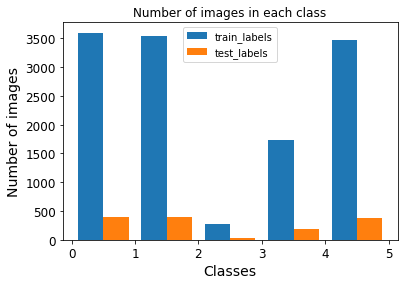

In [101]:
#trainlen = np.array([class1train,class2train,class3train,class4train,class5train])
#testlen = np.array([class1test,class2test,class3test,class4test,class5test])
fig, ax = plt.subplots()


#plt.hist(y_test_paper2, alpha=0.5, label='test_labels',color = 'cyan')
#plt.hist(y_train_paper2, alpha=0.5, label='train_labels',color = 'red')
plt.hist([y_train_paper2, y_test_paper2],bins=[0,1,2,3,4,5], label=['train_labels', 'test_labels'])
#plt.hist([y_train_paper2, y_test_paper2], label=['train_labels', 'test_labels'])

plt.ylabel("Number of images")
plt.xlabel("Classes")
plt.title("Number of images in each class")
plt.legend(loc='best')
plt.savefig('C://Users//user//Desktop//project253//number_of_images.png',dpi=100)
plt.show()

#ax.hist(y_test_paper2, edgecolor='white', linewidth=3,color = 'b')
#ax.hist(y_train_paper2, edgecolor='white', linewidth=3,color='r')

plt.show()

In [39]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test_paper2, y_pred_2))

print(confusion_matrix)

     0    1   2    3    4
0  370   29   0    0    1
1    7  380   0    2    4
2    0    3  17   10    0
3    0    3  11  178    0
4    9   15   1    5  355


In [40]:
confusion_matrix

,0,1,2,3,4
0,370,29,0,0,1
1,7,380,0,2,4
2,0,3,17,10,0
3,0,3,11,178,0
4,9,15,1,5,355


Code that is used for our project ends here.The rest are methods that didn't make it in our project or methods that are executed in the second notebook.

In [ ]:
#with data augmentation:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=90,horizontal_flip=True)# zca_whitening=True)
# prepare iterator
#datagen.fit(X_train_new)


In [ ]:
it_train = datagen.flow(X_train_paper,y_train_paper, batch_size=32,seed=42,class_mode='categorical',target_size=(106, 106),shuffle=True)
# fit model
steps = int(X_train_new.shape[0] / 32)
history1 = model.fit_generator(it_train, steps_per_epoch=steps, epochs=40, validation_data=(X_test_paper,y_test_paper))
# evaluate model
#_, acc = model.evaluate(X_test, y_test, verbose=0)
#print('> %.3f' % (acc * 100.0))
# learning curves

In [ ]:
#(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [ ]:
#train_on_batches!
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
#datagen = ImageDataGenerator(rescale=1./255)
datagen = ImageDataGenerator(rescale=1./255)
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('C:\\Users\\user\\Desktop\\project253\\X_train\\', class_mode='categorical', target_size=(212, 212),batch_size=32)
test_val_it = datagen.flow_from_directory('C:\\Users\\user\\Desktop\\project253\\X_test\\', class_mode='categorical', target_size=(212, 212),batch_size=32)
# confirm the iterator works
#batchX, batchy = train_it.next()#16 batch size=64 kanoniko!
#valto 188(12000/64)
#47 (3000/64)
model.fit_generator(train_it, steps_per_epoch=375, validation_data=test_val_it, validation_steps=94,epochs=60,shuffle='True')
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [ ]:
#Xception model!
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
np.random.seed(42)
tf.random.set_seed(42)
modelX = Xception(include_top=False , input_shape=(106,106,3),pooling = 'avg')
for layer in modelX.layers:
    layer.trainable = True
prev_output = Dense(2048,activation = 'relu')(modelX.output)
prev_output = BatchNormalization()(prev_output)
prev_output = Dropout(0.5)(prev_output)
prev_output = Dense(1024,activation = 'relu')(prev_output)
prev_output = BatchNormalization()(prev_output)
prev_output = Dropout(0.4)(prev_output)
prev_output = Dense(512,activation = 'relu')(prev_output)
prev_output = BatchNormalization()(prev_output)
prev_output = Dropout(0.3)(prev_output)
output = Dense(5, activation='softmax')(prev_output)
modelX = Model(modelX.input,output)
#optim = SGD(lr=0.001, momentum=0.9)
modelX.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',metrics = ['accuracy'])
modelX.summary()


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping 
early_stopping_2 = EarlyStopping(patience = 10, restore_best_weights = True,monitor='val_accuracy') #was p =15
#32i epoxi 68%
#14i epoxi 60% val_accuracy.
#8i 55% #batch size was 20 or 32 best,64 doesn't work
historyX = modelX.fit(X_train_paper, y_train_paper,shuffle='True',batch_size=32, epochs = 80, validation_data = (X_test_paper, y_test_paper),callbacks = [early_stopping_2])

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
np.random.seed(42)
tf.random.set_seed(42)
modelS = ResNet50(include_top=False , input_shape=(106,106,3),pooling = 'avg')
for layer in modelS.layers:
    layer.trainable = True
prev_output_2 = Dense(2048,activation = 'relu')(modelS.output)
prev_output_2 = BatchNormalization()(prev_output_2)
prev_output_2 = Dropout(0.5)(prev_output_2)
prev_output_2 = Dense(1024,activation = 'relu')(prev_output_2)
prev_output_2 = BatchNormalization()(prev_output_2)
prev_output_2 = Dropout(0.4)(prev_output_2)
prev_output_2 = Dense(512,activation = 'relu')(prev_output_2)
prev_output_2 = BatchNormalization()(prev_output_2)
prev_output_2 = Dropout(0.3)(prev_output_2)
output = Dense(5, activation='softmax')(prev_output_2)
modelS = Model(modelS.input,output)
#optim = SGD(lr=0.001, momentum=0.9)
modelS.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',metrics = ['accuracy'])
modelS.summary()


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.callbacks import EarlyStopping 
early_stopping_3 = EarlyStopping(patience = 15, restore_best_weights = True,monitor='val_accuracy') #was p =15
#32i epoxi 68%
#14i epoxi 60% val_accuracy.
#8i 55% #batch size was 20 or 32 best,64 doesn't work
historyS = modelS.fit(X_train_paper, y_train_paper,shuffle='True',batch_size=32, epochs = 80, validation_data = (X_test_paper, y_test_paper),callbacks = [early_stopping_3])

In [ ]:
fig= plt.figure( figsize = (12,8) )
plt.plot(modelS.history.history["val_accuracy"],     "g*-", label = "Validaton Accuracy ResNet50  ",alpha=0.5)
plt.plot(model.history.history["val_accuracy"], "k*-", label = "Validation Accuracy original model ",alpha=0.5)#k*--
plt.plot(modelX.history.history["val_accuracy"], "r-", label = "Validation Accuracy Xception ",alpha=0.5)
plt.ylabel("Accuracy")
plt.title("Accuracy score per epoch for various models")
plt.xlabel("Epochs")
plt.legend(loc='best')
plt.savefig('C://Users//user//Desktop//project253//val_acc.png',dpi=100)
plt.show()
